In [2]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

cars_data = pd.read_csv('C:/Users/Ahmad/Desktop/Python/Datasets/mpg.csv')
cars_data[['origin', 'name']] = cars_data[['origin', 'name']].astype('str')
cars_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


 We are performing a sanity check on our data before hypothesis testing in order to confirm that all the assumption of randomness, independence of observation and sample size are met.

 This is done by creating a boostrap distribution of the sample and checking if the histplot follows a normal distribution.

(array([  8.,  40.,  85., 207., 237., 212., 127.,  60.,  17.,   7.]),
 array([22.3821608 , 22.62261307, 22.86306533, 23.10351759, 23.34396985,
        23.58442211, 23.82487437, 24.06532663, 24.30577889, 24.54623116,
        24.78668342]),
 <BarContainer object of 10 artists>)

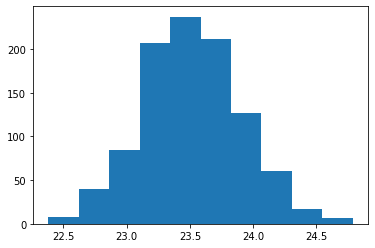

In [4]:
# generate a bootstrap distribution of our dataset

mpg_boot = []
for i in range(1000):
    mpg_boot.append(np.mean(cars_data.sample(frac=1, replace=True)['mpg']))

plt.hist(mpg_boot)

According to Google, the average mpg of american cars is 25.4 miles per galon. We are going to be testing an hypothesis that the average US Car has a mpg of 25.4 using a significance level (alpha = 0.1).

In [5]:
us_cars = cars_data[cars_data.origin =='usa']
us_cars.convert_dtypes()
us_cars.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      4
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [ ]:
us_cars['mpg'].describe()

count    249.000000
mean      20.083534
std        6.402892
min        9.000000
25%       15.000000
50%       18.500000
75%       24.000000
max       39.000000
Name: mpg, dtype: float64

Ho: u = 25.4 hp
Ha: u > 25.4 hp (our test is right-tailed)
alpha = 0.1

z value  = sample mean - hypothesized mean / standard error 

standard error = standard deviation / square root of n (sample population) 

In [ ]:

xbar = 21.0
std = 6.40
sqrt_n = np.sqrt(249)
hyp = 25.4

numerator = xbar - hyp
denominator = std/ sqrt_n

z_score = numerator/denominator
z_score

-10.848567013665901

In [ ]:
p_value = 1 - norm.cdf(z_score)
p_value

1.0

Since P value is greater than the significance level (alpha = 0.1), we fail to reject the hypothesis as there is enough evidence that the average US car has an MPG of 25.4.

For our confidence interval, we use 1- alpha = 1 - 0.1 = 0.9 (`90%` confidence interval) 

In [ ]:

lower = np.quantile(us_cars.mpg, 0.100)
upper = np.quantile(us_cars.mpg, 0.900)
print("Confidence Interval (alpha=0.1): ", (lower, upper))

Confidence Interval (alpha=0.1):  (13.0, 29.0)


<AxesSubplot:xlabel='origin', ylabel='mpg'>

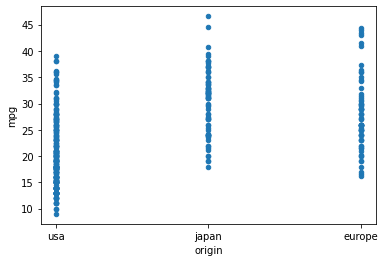

In [6]:
cars_data.plot(kind='scatter', y='mpg', x='origin')

From the plot above, we can see that Japanese cars and European cars seem to have similar mpg. Let's run an hypothesis test on that.

Ho = The mean of mpg for Japanese and European cars `is the same`.

Ha = There is a `difference` between the mean mpg of Jap and European cars.

Our test is two-tailed!.

In [7]:
#get the means of the mpg for the different car origins

cars_data.groupby('origin')['mpg'].mean()

origin
europe    27.891429
japan     30.450633
usa       20.083534
Name: mpg, dtype: float64